In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np

In [2]:
infile = open('appended.pkl','rb')
df = pickle.load(infile)
infile.close()
df = df.drop(columns=['satzID','Datum','Uhrzeit','Wochentag','Kalenderwoche','luecke','Monat','Tag','temp_ueb','done','HA__HA','HA__Self','HA__nt','HA__vt','HA__zt','UserID','UserAttribut'])
df_grouped = df.groupby('UebungsID').agg({'ID':'count','Erstloesung': 'sum', 'Schussel': 'sum', 'Erfolg': 'sum','Schwierigkeit': 'mean', 'ist_Schulzeit': 'first', 'MehrfachFalsch':'first', 'vorher_abgebrochen':'first', 'y':'first', 
'Klassenstufe':'first', 'Jahredabei':'first', 'AnzahlAufgaben':'first', 'Art__GK':'first', 'Art__GR':'first', 'Art__GZ':'first',
       'Art__K':'first', 'Art__LB':'first','Sex__m':'first', 'Sex__w':'first', 'Testposition__pruefung':'sum', 'Testposition__training':'sum','Testposition__version':'sum'})

df_grouped['Fehler'] = df_grouped['ID'] - df_grouped['Erfolg']

<AxesSubplot:xlabel='Art__K', ylabel='count'>

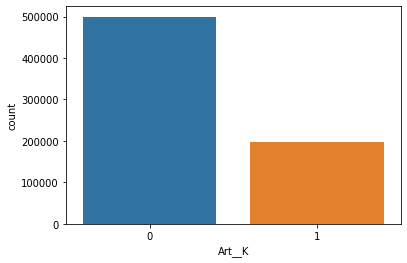

In [15]:
sns.countplot(data=df_grouped, x='Art__K')

In [13]:
t = df_grouped[['y','ID']]
tr = t.groupby(t.y).count()

percentage = 614475/(614475+81792)
percentage



0.8825278233781007

In [14]:
percentage = 81792/(614475+81792)
percentage

0.11747217662189936

In [4]:
df['steps']

9         -7
10        -1
11         0
12        -4
13        -6
          ..
1687122   -8
1687123   -9
1687270   -8
1687271   -9
1687304   -9
Name: steps, Length: 14994578, dtype: int64

In [6]:
df.columns

Index(['ID', 'UebungsID', 'Erstloesung', 'Schussel', 'Erfolg', 'Schwierigkeit',
       'ist_Schulzeit', 'MehrfachFalsch', 'sessionNr', 'OrderNumber',
       'vorher_abgebrochen', 'y', 'Fehler', 'Klassenstufe', 'Jahredabei',
       'AnzahlAufgaben', 'steps', 'Art__GK', 'Art__GR', 'Art__GZ', 'Art__K',
       'Art__LB', 'Sex__m', 'Sex__w', 'Testposition__pruefung',
       'Testposition__training', 'Testposition__version'],
      dtype='object')

In [4]:
df_grouped

,ID,Erstloesung,Schussel,Erfolg,Schwierigkeit,ist_Schulzeit,MehrfachFalsch,vorher_abgebrochen,y,Klassenstufe,...,Art__GR,Art__GZ,Art__K,Art__LB,Sex__m,Sex__w,Testposition__pruefung,Testposition__training,Testposition__version,Fehler
UebungsID,,,,,,,,,,,,,,,,,,,,,
10099568_1,14,12,0,13,-0.452592,1,0,0,1,5,...,0,0,0,1,0,1,1,11,2,1
10318051_1,10,10,0,10,-0.131507,1,0,0,1,5,...,0,0,0,1,0,1,0,10,0,0
10514758_1,10,10,0,10,0.232786,1,0,0,1,10,...,0,0,0,1,0,1,0,10,0,0
10514759_1,10,10,0,10,-0.036805,1,0,0,1,10,...,0,0,0,1,0,1,0,10,0,0
10561197_1,10,10,0,10,-1.297833,1,0,0,1,10,...,0,0,0,1,0,1,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567138_1,10,10,3,10,0.257718,0,0,0,1,9,...,0,0,0,1,0,1,0,10,0,0
9567139_1,30,18,0,25,1.032074,0,0,0,1,9,...,0,0,0,1,0,1,5,14,11,5
9588249_1,9,5,0,8,0.605129,0,0,0,0,9,...,0,0,0,1,0,1,4,5,0,1


In [5]:
df

,ID,UebungsID,Erstloesung,Schussel,Erfolg,Schwierigkeit,ist_Schulzeit,MehrfachFalsch,sessionNr,OrderNumber,...,Art__GK,Art__GR,Art__GZ,Art__K,Art__LB,Sex__m,Sex__w,Testposition__pruefung,Testposition__training,Testposition__version
9,165666375,18922861_2,1,0,1,-0.972831,1,0,2,3,...,0,0,0,1,0,1,0,0,0,1
10,165666682,18922861_2,0,0,1,-1.430680,1,0,2,13,...,0,0,0,1,0,1,0,1,0,0
11,165666692,18922861_2,0,0,1,-1.430680,1,0,2,14,...,0,0,0,1,0,1,0,1,0,0
12,165666470,18922861_2,1,0,1,-1.605780,1,0,2,6,...,0,0,0,1,0,1,0,0,1,0
13,165666409,18922861_2,1,0,1,0.113126,1,0,2,4,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687122,170382999,19348449_1,1,0,0,2.236260,1,4,1,2,...,0,0,0,0,1,0,1,0,1,0
1687123,170382881,19348449_1,1,0,1,-0.187560,1,0,1,1,...,0,0,0,0,1,0,1,0,1,0
1687270,180831195,20761019_1,1,0,0,2.236260,1,0,1,2,...,0,0,0,0,1,0,1,0,1,0
1687271,180831029,20761019_1,1,0,1,-0.187560,1,0,1,1,...,0,0,0,0,1,0,1,0,1,0


In [28]:
df_grouped_1 = df_grouped[df_grouped.y == 1]
df_grouped_0 = df_grouped[df_grouped.y == 0]

df_grouped_1 = df_grouped_1.sample(n=150000)

df_grouped = df_grouped_1.append(df_grouped_0)

<AxesSubplot:xlabel='y', ylabel='count'>

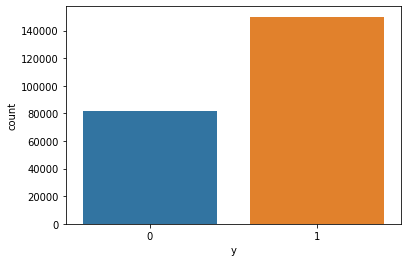

In [29]:
sns.countplot(x='y', data=df_grouped)

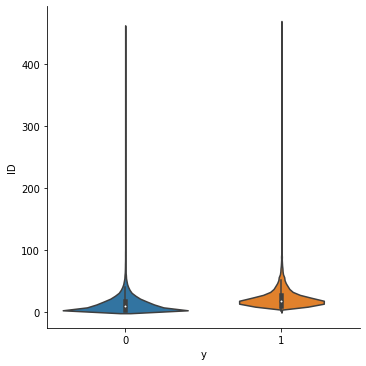

In [8]:
#Anzahl ID und y
sns.catplot(x="y", y="ID", data=df_grouped, kind='violin')


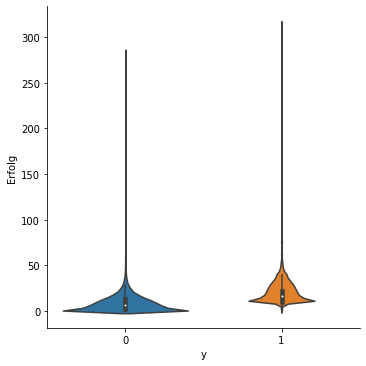

In [10]:
#Anzahl Erfolg und y
sns.catplot(x="y", y="Erfolg", data=df_grouped, kind='violin')


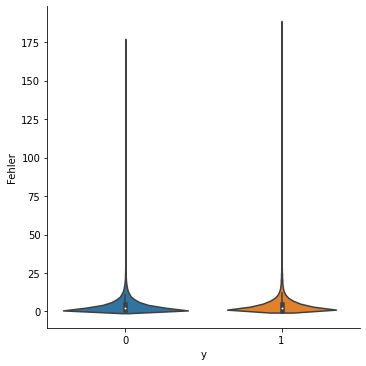

In [23]:
#Fehler und y
sns.catplot(x="y", y="Fehler", data=df_grouped, kind='violin')


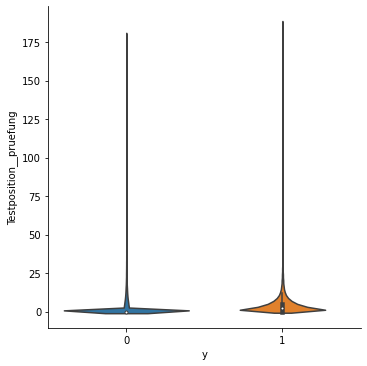

In [24]:
sns.catplot(x="y", y="Testposition__pruefung", data=df_grouped, kind='violin')


In [ ]:

# Schwierigkeit und y
#Mehrfach_Falsch und y
# vorher abgebrochen und y
#Klassenstufe und y
#Sex und y
#Testposition und y

In [22]:
pd.set_option('display.max_rows', 30)

df_t = df[df.UebungsID == '12187129_1']
df_t = df_t.sort_values(by ='OrderNumber')
df_t


,ID,UebungsID,Erstloesung,Schussel,Erfolg,Schwierigkeit,ist_Schulzeit,MehrfachFalsch,sessionNr,OrderNumber,...,Art__GK,Art__GR,Art__GZ,Art__K,Art__LB,Sex__m,Sex__w,Testposition__pruefung,Testposition__training,Testposition__version
1160921,186794288,12187129_1,1,0,1,-1.912920,0,0,1,1,...,0,0,0,0,1,1,0,0,1,0
1160922,186794530,12187129_1,1,2,0,1.732180,0,2,1,2,...,0,0,0,0,1,1,0,0,1,0
1160851,186794840,12187129_1,1,0,0,1.361300,0,3,1,3,...,0,0,0,0,1,1,0,0,0,1
1160967,186795174,12187129_1,1,0,0,-0.117196,0,1,1,4,...,0,0,0,0,1,1,0,0,0,1
1160923,186795297,12187129_1,0,0,1,1.732180,0,0,1,5,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160897,186833367,12187129_1,0,0,1,2.824110,1,0,1,118,...,0,0,0,0,1,1,0,1,0,0
1160907,186833457,12187129_1,0,0,1,1.621570,1,0,1,119,...,0,0,0,0,1,1,0,1,0,0
1160876,186833610,12187129_1,0,0,0,1.648130,1,3,1,120,...,0,0,0,0,1,1,0,1,0,0
1160870,186834098,12187129_1,0,0,1,2.272290,1,0,1,121,...,0,0,0,0,1,1,0,1,0,0
